In [ ]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [1]:
import networkit as nk
import numpy as np
import matplotlib.pyplot as plt
import time
import phate

from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler

from External.WS_Tree_dist import EMD_dist_tree_discretized, EMD_dist_tree_edge, plot_flow_discretized
from External.ICT.calculate_ICT import calculate_ICT, compute_widths, calculate_ICT_update
from External.clustering import k_means_pp
from External.generation import create_graph


from itertools import chain
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist
from numpy.linalg import norm
from copy import deepcopy


plt.style.use('standard.mplstyle')

# Hyperparameters
mode = "Delaunay"
metric = "euclidean"

# Load the data

position, labels = phate.tree.gen_dla(n_dim=2, n_branch=3,
                                            branch_length=2500, rand_multiplier=2, seed=37, sigma=1)
labels_unique = np.unique(labels)


position = StandardScaler().fit_transform(position)
number_of_nodes = len(position)

number_of_nodes = len(position)

In [2]:
G = nk.readGraph("./Output/instead_of_density/delaunay_graph", nk.Format.EdgeListTabOne)
G.indexEdges()

ICT_cluster_all = nk.readGraph("./Output/instead_of_density/cluster_ICT", nk.Format.EdgeListTabOne)
ICT_cluster_all.indexEdges()

In [3]:
# calculate the clusters
ε, δ = 0.03, 0.1
r = 1 / (ε**2) * (int(np.log2(number_of_nodes - 1)) + 1 + np.log(1/δ))
k = int(np.sqrt(r))
k = np.min((k, G.numberOfNodes()))
print(k)
cluster_centers = k_means_pp(k, position, metric=metric, G=G)

130


In [4]:
# widths of the edges
widths_cluster_all = compute_widths(ICT_cluster_all)

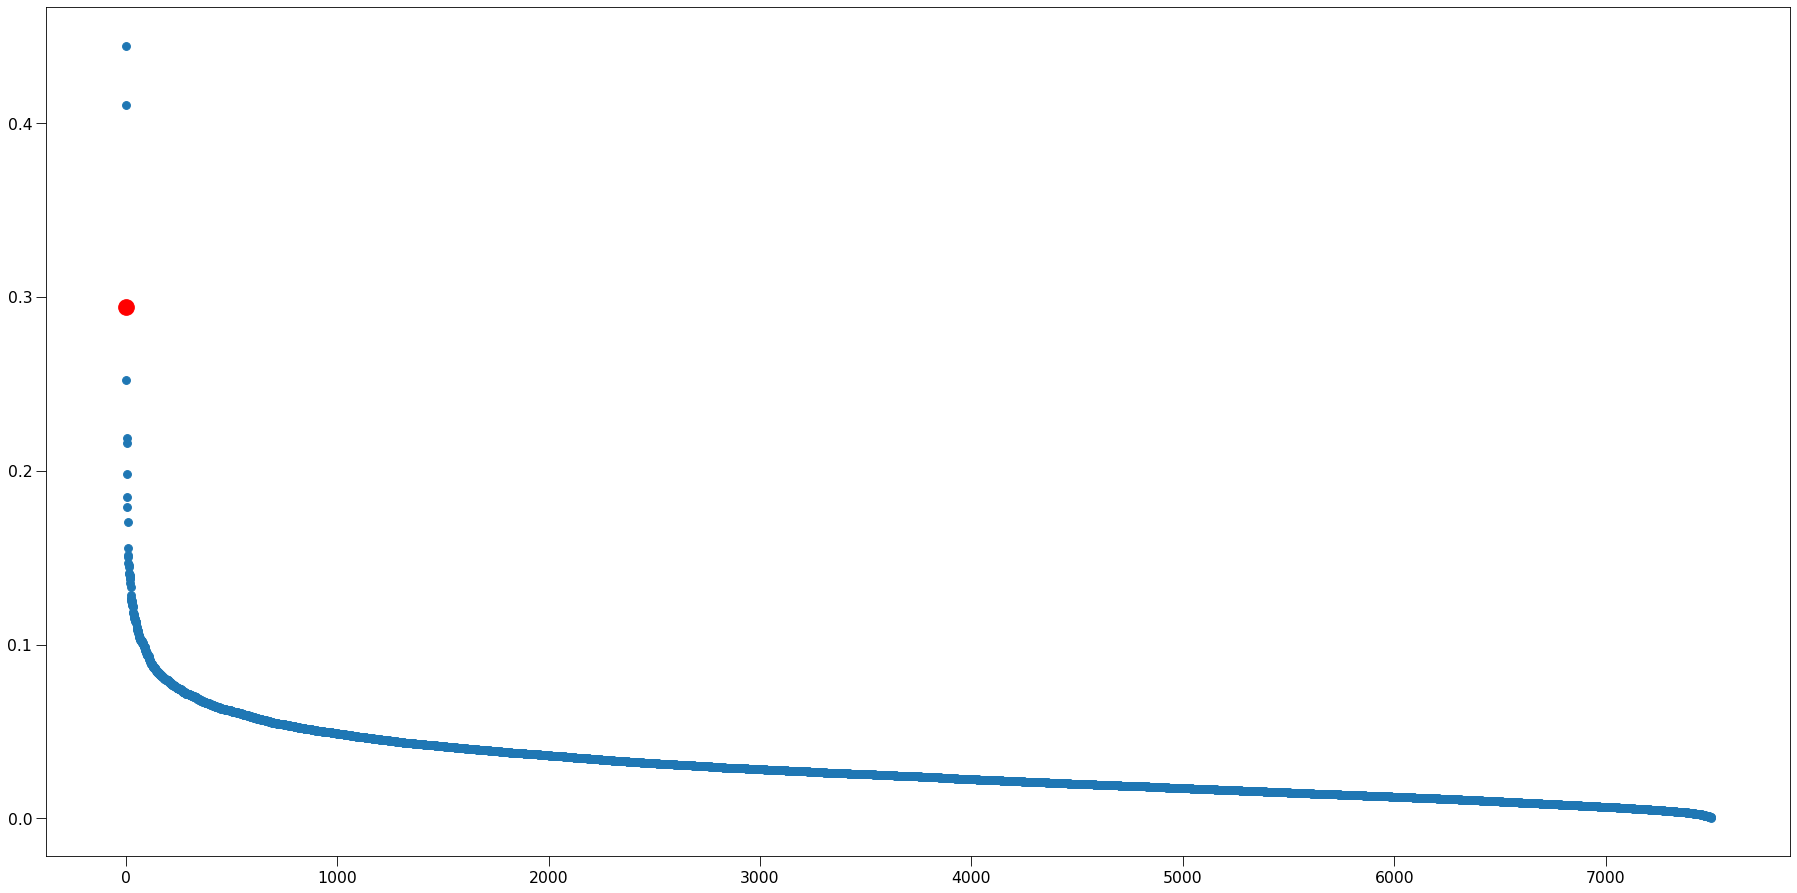

update Arr 22478 -> 20429
added 71 edges early
update Arr 20429 -> 18558
added 74 edges early
update Arr 18558 -> 16845
added 79 edges early
update Arr 16845 -> 15301
added 107 edges early
update Arr 15301 -> 13895
added 189 edges early
update Arr 13895 -> 12599
added 241 edges early
update Arr 12599 -> 11439
added 308 edges early
update Arr 11439 -> 10379
added 362 edges early
update Arr 10379 -> 9425
added 472 edges early
update Arr 9425 -> 8564
added 538 edges early
update Arr 8564 -> 7763
added 503 edges early
update Arr 7763 -> 7499
added 188 edges early
added 3371 edges early



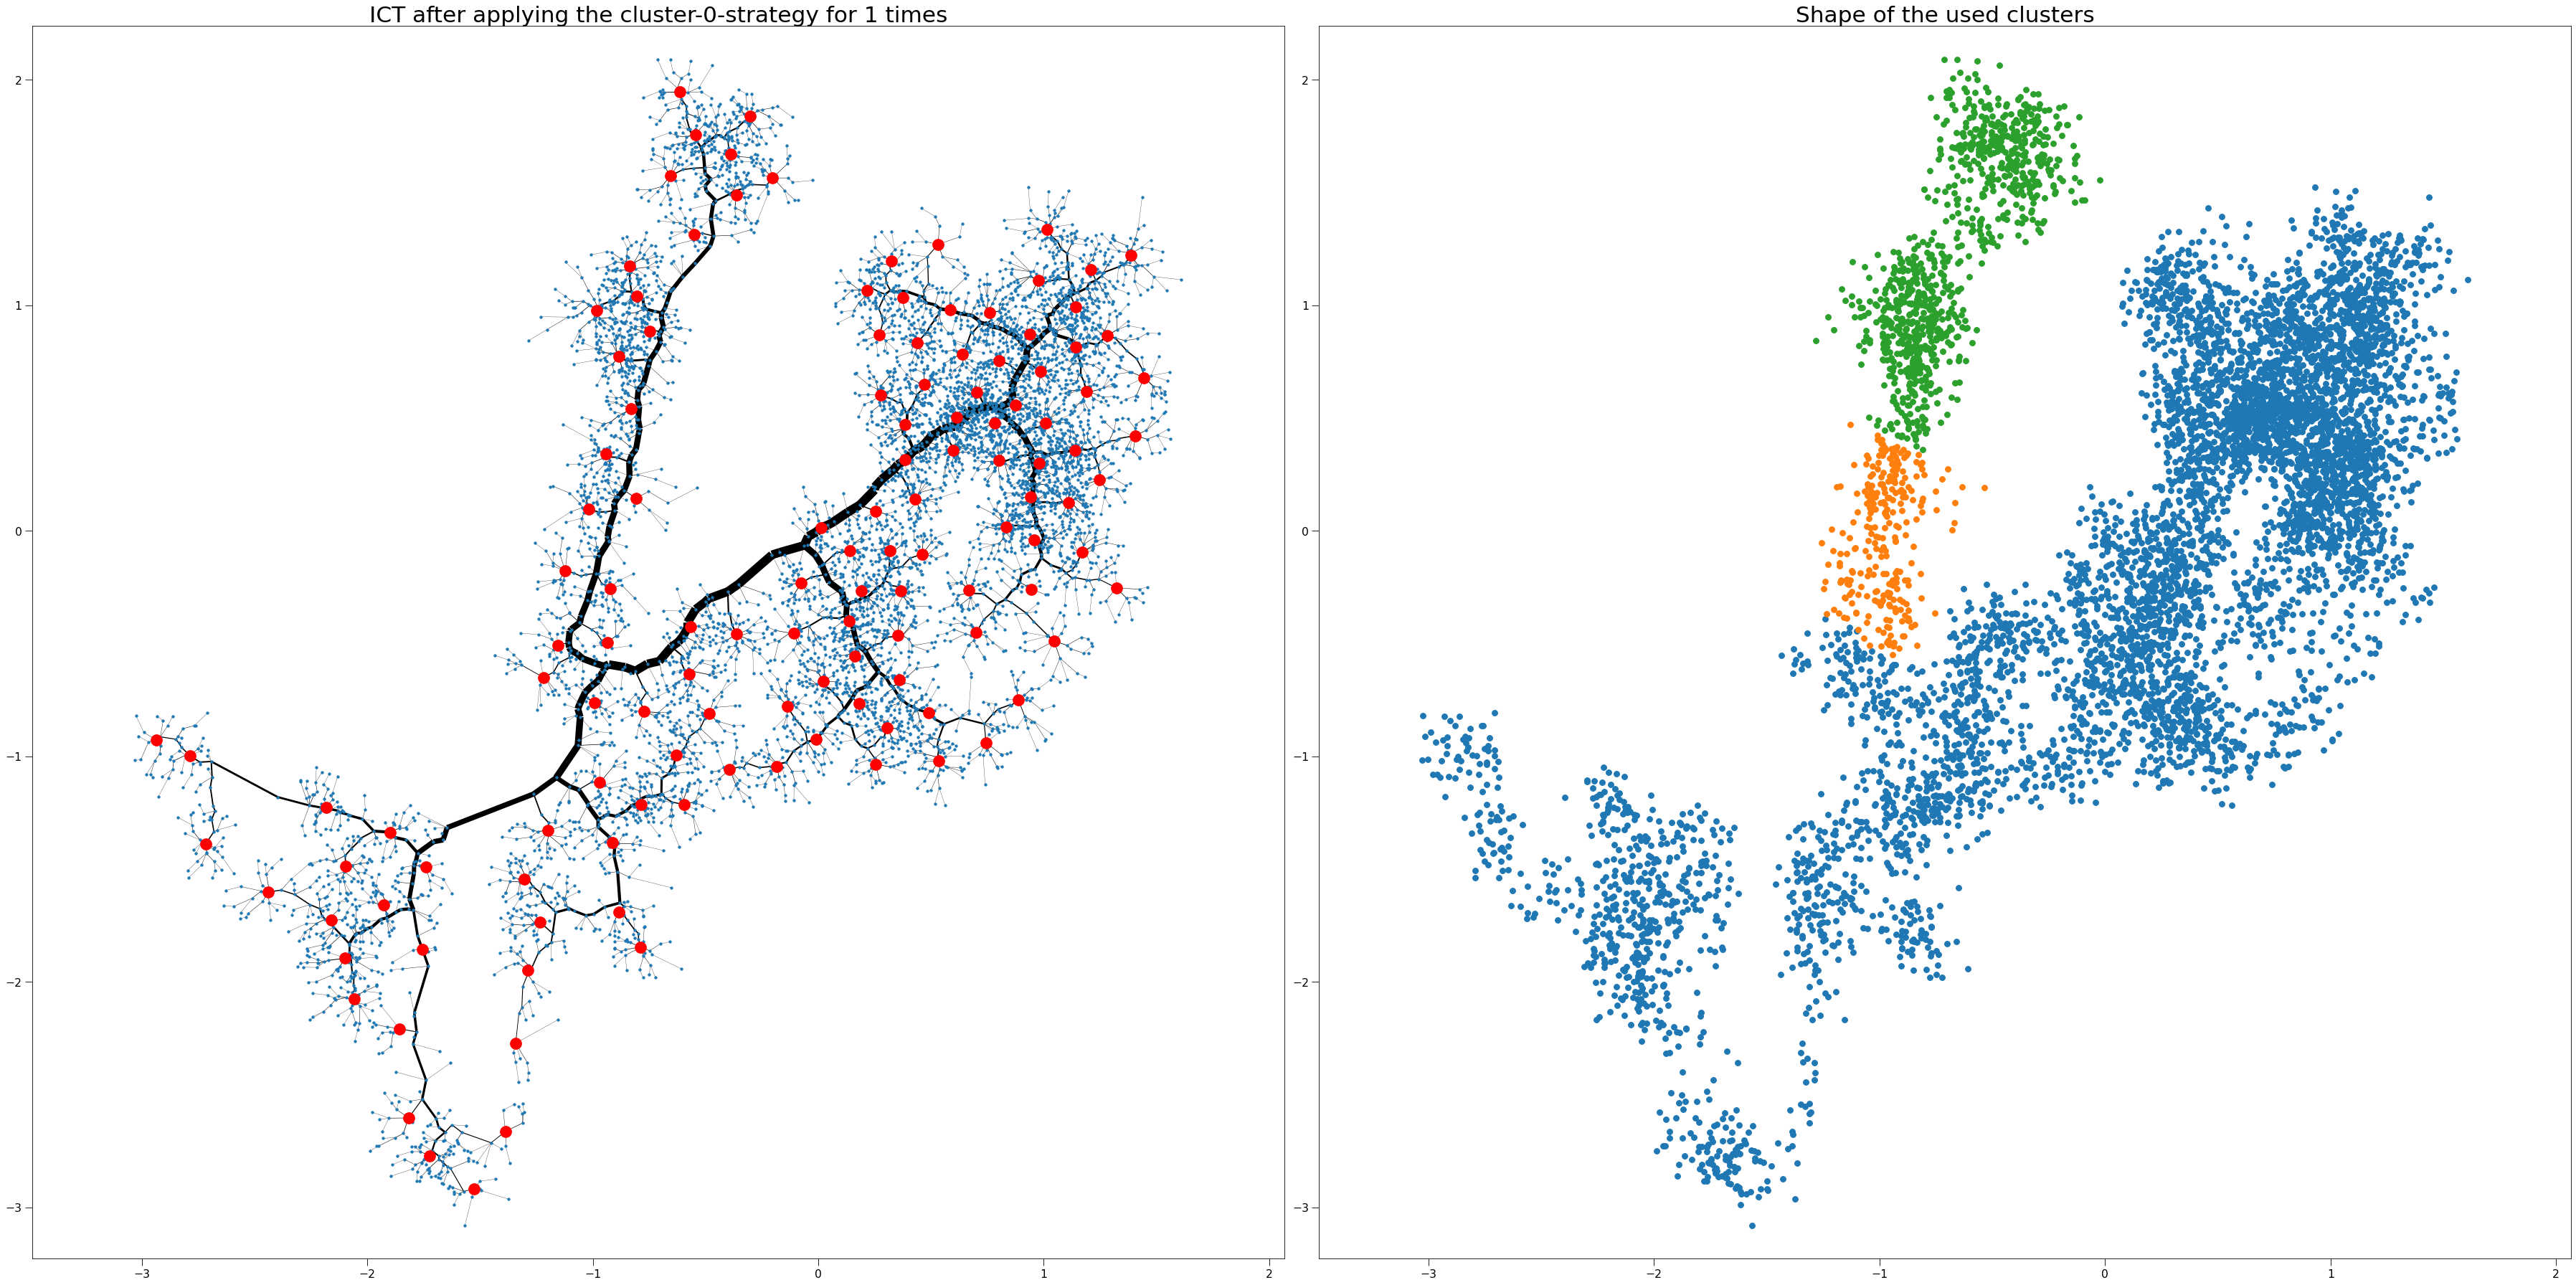

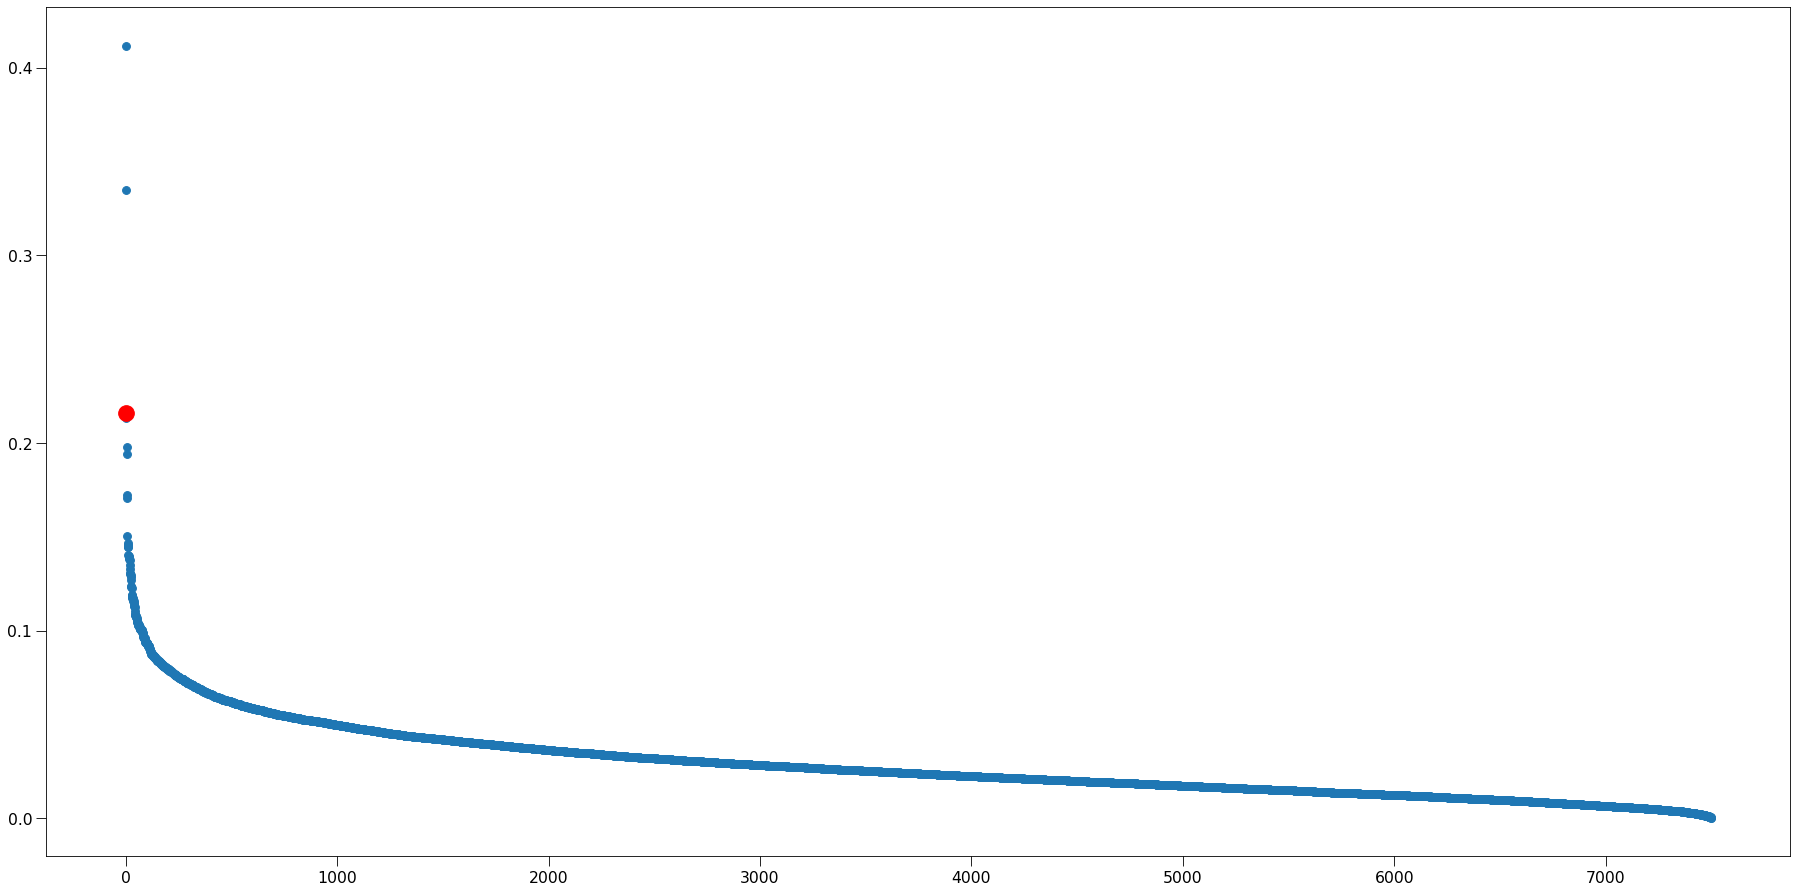

update Arr 22478 -> 20387
added 30 edges early
update Arr 20387 -> 18533
added 102 edges early
update Arr 18533 -> 16848
added 90 edges early
update Arr 16848 -> 15310
added 101 edges early



RuntimeError: Received CTRL+C/SIGINT

In [5]:
new_ICT = deepcopy(ICT_cluster_all)
for i in range(20):

    new_ICT, new_components, _ = calculate_ICT_update(new_ICT, G, position, cluster_centers,
                                                      used_components=2, reduction_factor=1000)

    new_width = compute_widths(new_ICT)


    names = [f"ICT after applying the cluster-0-strategy for {i+1} times",
             "Shape of the used clusters"]


    number_of_plots = len(names)
    fig, ax = plt.subplots(1,number_of_plots, figsize=(24*2,24))

    if number_of_plots == 1:
        ax = [ax]

        
    nk.viztasks.drawGraph(new_ICT, pos=position, ax=ax[0], width=new_width, node_size=10)
    ax[0].plot(*position[cluster_centers].T, marker="o", color = "Red")
    
    for component in new_components:
        ax[1].plot(*position[component].T)
    
    for i in range(number_of_plots):

        ax[i].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)
        ax[i].set_axis_on()
        ax[i].set_title(names[i])
        ax[i].axis("equal")

    plt.tight_layout()
    plt.savefig(f"./Output/instead_of_density/ICT_update_{i}.png")
    plt.show()